# 🧪 Roteiro de Laboratório — Método Bootstrap

### 🎯 Tema: Estimando a média do teor de açúcar com Bootstrap
---
### 📘 **Contexto**

Você trabalha como cientista de alimentos em uma empresa que desenvolveu uma nova barra energética. Por conta do custo de análise laboratorial, foi possível medir o conteúdo de açúcar (em gramas) de apenas **5 amostras**:

```python
dados = [18.2, 19.4, 20.1, 21.6, 18.9]
```

Seu objetivo é:
- Estimar a **média populacional** do teor de açúcar;
- Avaliar a **incerteza** associada a essa média;
- Construir um **intervalo de confiança de 95%**.

### 🧭 Passo 1: Estatística Descritiva Inicial

Média: 19.639999999999997
Desvio padrão: 1.2973048986263804


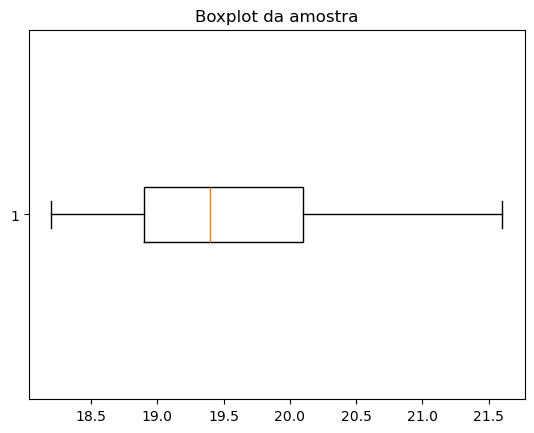

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dados = np.array([18.2, 19.4, 20.1, 21.6, 18.9])

print("Média:", np.mean(dados))
print("Desvio padrão:", np.std(dados, ddof=1))

plt.boxplot(dados, vert=False)
plt.title("Boxplot da amostra")
plt.show()

### 🔁 Passo 2: Aplicando o Método Bootstrap

In [2]:
B = 1000
n = len(dados)
medias_bootstrap = []

np.random.seed(42)

for _ in range(B):
    amostra = np.random.choice(dados, size=n, replace=True)
    medias_bootstrap.append(np.mean(amostra))

### 📊 Passo 3: Visualizando os Resultados

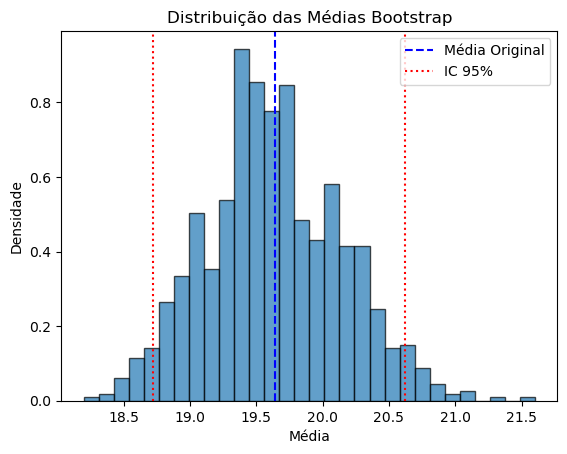

In [3]:
IC_95 = np.percentile(medias_bootstrap, [2.5, 97.5])
media_original = np.mean(dados)

plt.hist(medias_bootstrap, bins=30, edgecolor='black', alpha=0.7, density=True)
plt.axvline(media_original, color='blue', linestyle='--', label='Média Original')
plt.axvline(IC_95[0], color='red', linestyle=':', label='IC 95%')
plt.axvline(IC_95[1], color='red', linestyle=':')
plt.title("Distribuição das Médias Bootstrap")
plt.xlabel("Média")
plt.ylabel("Densidade")
plt.legend()
plt.show()

### 📋 Passo 4: Responda às Questões

1. Qual é a média da amostra original?
2. Qual o erro padrão estimado pelo Bootstrap?
3. Qual o intervalo de confiança de 95%?
4. O intervalo de confiança é simétrico em torno da média original? O que isso indica?
5. Compare com a fórmula tradicional do intervalo de confiança da média (assumindo normalidade). Os resultados são semelhantes?

### 💬 Discussão Final

- Por que o Bootstrap funciona mesmo com poucos dados?
- Em que situações ele é preferível aos métodos clássicos?
- Que outros parâmetros, além da média, poderiam ser estimados com Bootstrap?